# An example of running the METS-R SIM interactively

# Section 1: Start, reset and terminate the simulation

In [83]:
from utils.util import *
from clients.METSRClient import METSRClient

In [84]:
config = read_run_config("configs/run_cosim_CARLAT5.json")
config.verbose = True # set to True to see the message

In [85]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

Container ID: f5c8dd5cdaf01094123f9f955b19c6e2f70945508ac73f2c664c085d7a4abfaf

Error msg: 
['output/CARLAT05_20250428_070456_seed_42']


In [86]:
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=True)

Attempt to connect to ws://localhost:4000 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connected to ws://localhost:4000
Connection established!
('2025-04-28 07:05:13', 'RECEIVED', (('TYPE', 'ANS_ready'),))
('2025-04-28 07:05:13', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))


In [6]:
# start the visualization server so the trajectory can be visualized at https://engineering.purdue.edu/HSEES/METSRVis/
client.start_viz()

Serving output/CARLAT05_20250428_063043_seed_42\trajectory_output\2025-04-28-0530-55 with CORS enabled on port 8000...


127.0.0.1 - - [28/Apr/2025 06:31:24] "GET / HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 64083)
Traceback (most recent call last):
  File "c:\Users\ALei\anaconda3\envs\carla\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 381, in <lambda>
    handler_class = lambda *args, **kwargs: CORSRequestHandler(*args, directory=directory, **kwargs)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 367, in __init__
    super().__init__(*args, directory=directory, **kwargs)
  File

In [7]:
# Generating 50 trips in 500 ticks.
for i in range(500):
      if(i % 10 == 0):
            client.generate_trip(i, -1, -1)
      client.tick(1)

('2025-04-28 06:31:10', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 0, 'orig': -1, 'dest': -1}])))
('2025-04-28 06:31:10', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 12, 'destination': 2, 'ID': 0}]), ('TYPE', 'CTRL_generateTrip')))
('2025-04-28 06:31:10', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 1)))
('2025-04-28 06:31:10', 'RECEIVED', (('TICK', 1), ('TYPE', 'STEP')))
('2025-04-28 06:31:10', 'SENT', (('TYPE', 'STEP'), ('TICK', 1), ('NUM', 1)))
('2025-04-28 06:31:10', 'RECEIVED', (('TICK', 2), ('TYPE', 'STEP')))
('2025-04-28 06:31:10', 'SENT', (('TYPE', 'STEP'), ('TICK', 2), ('NUM', 1)))
('2025-04-28 06:31:10', 'RECEIVED', (('TICK', 3), ('TYPE', 'STEP')))
('2025-04-28 06:31:10', 'SENT', (('TYPE', 'STEP'), ('TICK', 3), ('NUM', 1)))
('2025-04-28 06:31:10', 'RECEIVED', (('TICK', 4), ('TYPE', 'STEP')))
('2025-04-28 06:31:10', 'SENT', (('TYPE', 'STEP'), ('TICK', 4), ('NUM', 1)))
('2025-04-28 06:31:10', 'RECEIVED', (('TICK', 5), ('TYPE', 'STEP')))

In [8]:
# reset the simulation using CARLA Town05's map
client.reset()

('2025-04-28 06:31:14', 'SENT', (('TYPE', 'CTRL_reset'),))
('2025-04-28 06:31:15', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_reset')))
('2025-04-28 06:31:15', 'SENT', (('TYPE', 'STEP'), ('TICK', -1), ('NUM', 1)))
('2025-04-28 06:31:23', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))
Visualization server stopped.
Serving output/CARLAT05_20250428_063043_seed_42\trajectory_output\2025-04-28-0531-15 with CORS enabled on port 8000...


127.0.0.1 - - [28/Apr/2025 06:31:36] "GET / HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 64088)
Traceback (most recent call last):
  File "c:\Users\ALei\anaconda3\envs\carla\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 381, in <lambda>
    handler_class = lambda *args, **kwargs: CORSRequestHandler(*args, directory=directory, **kwargs)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 367, in __init__
    super().__init__(*args, directory=directory, **kwargs)
  File

In [9]:
# This is doing the same thing as above, but in a more efficient way
for i in range(50):
      client.generate_trip(i, -1, -1)
      client.tick(10)

('2025-04-28 06:31:29', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 0, 'orig': -1, 'dest': -1}])))
('2025-04-28 06:31:29', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 2, 'destination': 8, 'ID': 0}]), ('TYPE', 'CTRL_generateTrip')))
('2025-04-28 06:31:29', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 10)))
('2025-04-28 06:31:29', 'RECEIVED', (('TICK', 10), ('TYPE', 'STEP')))
('2025-04-28 06:31:29', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 1, 'orig': -1, 'dest': -1}])))
('2025-04-28 06:31:29', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 5, 'destination': 17, 'ID': 1}]), ('TYPE', 'CTRL_generateTrip')))
('2025-04-28 06:31:29', 'SENT', (('TYPE', 'STEP'), ('TICK', 10), ('NUM', 10)))
('2025-04-28 06:31:29', 'RECEIVED', (('TICK', 20), ('TYPE', 'STEP')))
('2025-04-28 06:31:29', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 2, 'orig': -1, 'dest': -1}])))
('2025-04-28 06:31:29', 'RECEIVED', (('CODE', '

In [10]:
# one can close the connection without terminating the simulation
client.close()

# and reestablish the connection ideally from the other machine
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=True)

Visualization server stopped.
Connected to ws://localhost:4000
Connection established!
('2025-04-28 06:31:39', 'RECEIVED', (('TICK', 500), ('TYPE', 'STEP')))


In [11]:
client.reset()

('2025-04-28 06:31:40', 'SENT', (('TYPE', 'CTRL_reset'),))
('2025-04-28 06:31:41', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_reset')))
('2025-04-28 06:31:41', 'SENT', (('TYPE', 'STEP'), ('TICK', -1), ('NUM', 1)))
('2025-04-28 06:31:49', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))


In [12]:
# generate trips between roads
import random
road_ids = client.query_road()
road_ids

('2025-04-28 06:31:51', 'SENT', (('TYPE', 'QUERY_road'),))
('2025-04-28 06:31:51', 'RECEIVED', (('id_list', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]), ('orig_id', ['-0', '-1', '-10', '-11', '-13', '-14', '-16', '-18', '-19', '-2', '-20', '-21', '-22', '-23', '-24', '-26', '-27', '-28', '-29', '-3', '-30', '-32', '-36', '-38', '-39', '-4', '-41', '-42', '-43', '-44', '-45', '-46', '-47', '-48', '-5', '-50', '-51', '-52', '-6', '-7', '-8', '-9', '0', '1', '10', '11', '13', '15', '17', '19', '2', '20', '21', '22', '23', '24', '25', '27', '28', '3', '31', '33', '35', '37', '39', '4', '40', '41', '42', '43', '44', '45', '46', '48', '49', '51', '6', '7', '8', '9']), ('TYPE', 'ANS_road')))


{'id_list': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80],
 'orig_id': ['-0',
  '-1',
  '-10',
  '-11',
  '-13',
  '-14',
  '-16',
  '-18',
  '-19',
  '-2',
  '-20',
  '-21',
  '-22',
  '-23',
  '-24',
  '-26',
  '-27',
  '-28',
  '-29',
  '-3',
  '-30',
  '-32',
  '-36',
  '-38',
  '-39',
  '-4',
  '-41',
  '-42',
  '-43',
  '-44',
  '-45',
  '-46',
  '-47',
  '-48',
  '-5',
  '-50',
  '-51',
  '-52',
  '-6',
  '-7',
  '-8',
  '-9',
  '0',
  '1',
  '10',
  '11',
  '13',
  '15',
  '17',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '27',
  '28',
  '3'

In [13]:
for i in range(500):
      client.tick(10)
      origin_road = random.choice(road_ids['orig_id'])
      destination_road = random.choice(road_ids['orig_id'])
      client.generate_trip_between_roads(i, origin_road, destination_road)

('2025-04-28 06:31:53', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 10)))
('2025-04-28 06:31:53', 'RECEIVED', (('TICK', 10), ('TYPE', 'STEP')))
('2025-04-28 06:31:53', 'SENT', (('TYPE', 'CTRL_genTripBwRoads'), ('DATA', [{'vehID': 0, 'orig': '-30', 'dest': '39'}])))
('2025-04-28 06:31:53', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': '-30', 'destination': '39', 'vehID': 0}]), ('TYPE', 'CTRL_genTripBwRoads')))
('2025-04-28 06:31:53', 'SENT', (('TYPE', 'STEP'), ('TICK', 10), ('NUM', 10)))
('2025-04-28 06:31:53', 'RECEIVED', (('TICK', 20), ('TYPE', 'STEP')))
('2025-04-28 06:31:53', 'SENT', (('TYPE', 'CTRL_genTripBwRoads'), ('DATA', [{'vehID': 1, 'orig': '19', 'dest': '-38'}])))
('2025-04-28 06:31:53', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': '19', 'destination': '-38', 'vehID': 1}]), ('TYPE', 'CTRL_genTripBwRoads')))
('2025-04-28 06:31:53', 'SENT', (('TYPE', 'STEP'), ('TICK', 20), ('NUM', 10)))
('2025-04-28 06:31:53', 'RECEIVED', (('TICK', 

In [14]:
# stop the visualization server, note visualization server is already stopped when the previous client is closed so nothing is going to be printed
client.stop_viz()

In [15]:
# terminate the simulation
client.terminate()

('2025-04-28 06:32:03', 'SENT', (('TYPE', 'CTRL_end'),))
('2025-04-28 06:32:03', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_end')))


# Section 2: Query APIs

In this example, we will see how to use query to extract data from the simulation.

In [16]:
from utils.util import *
from clients.METSRClient import METSRClient

In [17]:
config = read_run_config("configs/run_interactive_NYC.json")
config.verbose = True # set to True to see the message

In [18]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)


No port number specified, find available ports for simulation instances
Container ID: 9573569516c373bbb20d0f91852fe3f8dc2cf4d3a743e26e9dd350ca6e7e53b1

Error msg: 
['output/NYC_20250428_063208_seed_42']


In [19]:
# If no metsr_port is specified, the runner will find the port automatically 
config.ports

[64099]

In [20]:
# Better to  set up a larger timeout (default is 30s) if your map/vehicle number is huge
sim_client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port = config.ports[0], verbose=False, timeout=300) 

Attempt to connect to ws://localhost:64099 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connection established!


In [21]:
# Great! Now we run the simulation for 0.5 h (0.1s/tick correspond to the real world time) and then query the data
# Since this one is going to take a little bit longer, we set wait_forever to True
sim_client.tick(18000, wait_forever=True)

Now let's do some query.

In [22]:
# if no vehicle id is specified, a list of all buses will be returned
sim_client.query_bus()

{'id_list': [4032,
  4033,
  4034,
  4035,
  4036,
  4037,
  4038,
  4000,
  4001,
  4002,
  4003,
  4004,
  4005,
  4006,
  4007,
  4008,
  4009,
  4010,
  4011,
  4012,
  4013,
  4014,
  4015,
  4016,
  4017,
  4018,
  4019,
  4020,
  4021,
  4022,
  4023,
  4024,
  4025,
  4026,
  4027,
  4028,
  4029,
  4030,
  4031],
 'TYPE': 'ANS_bus'}

In [23]:
# this vehicle has reached the second stop
sim_client.query_bus(4032)

{'DATA': [{'battery_state': 128.93255555927948,
   'route': 1640016,
   'current_stop': 1,
   'pass_num': 0,
   'ID': 4032,
   'stop_list': [180, 156, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [24]:
# similarly, one can query taxis
sim_client.query_taxi()

{'id_list': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,


In [25]:
# This vehicle is in state 0, meaning it is parking
sim_client.query_taxi(23)

{'DATA': [{'pass_num': 1,
   'origin': 131,
   'x': -73.82128284412839,
   'y': 40.710848433176395,
   'ID': 23,
   'state': 1,
   'dest': 224}],
 'TYPE': 'ANS_taxi'}

In [26]:
# Find a taxi, which is carrying passengers
for i in sim_client.query_taxi()['id_list']:
      res = sim_client.query_taxi(i)
      if res['DATA'][0]['pass_num']>0:
            print(i)
            print(res)
            break

0
{'DATA': [{'pass_num': 1, 'origin': 131, 'x': -73.92849731916652, 'y': 40.78215471769424, 'ID': 0, 'state': 1, 'dest': 157}], 'TYPE': 'ANS_taxi'}


In [27]:
# One can also query the facilities in the simulation
sim_client.query_road()

{'id_list': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157

In [28]:
# This id can be found in the road csv (or SUMO XML) in the data folder
sim_client.query_road('-1103160164')

{'DATA': [{'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 0.6881209296457934,
   'length': 21.533230627219883,
   'ID': '-1103160164',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1}],
 'TYPE': 'ANS_road'}

In [29]:
# Also, a list of ID can be used to query multiple roads
sim_client.query_road(sim_client.query_road()['orig_id'][:5])

{'DATA': [{'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 0.6705407306421266,
   'length': 20.983096975837938,
   'ID': '-1000767813#0',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 3.2554446898294533,
   'length': 101.87197958989512,
   'ID': '-1000767813#1',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 3.248811767907337,
   'length': 101.66441689077072,
   'ID': '-1000767813#2',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 10.854738919311911,
   'length': 339.67517405424377,
   'ID': '-1000767813#7',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 0.34565855137985607,
   'length': 10.81662391661956,
   'ID': '-1001065257',
  

In [30]:
sim_client.query_signal()

{'id_list': [1,
  2,
  4,
  10,
  11,
  12,
  13,
  15,
  16,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  34,
  36,
  42,
  44,
  45,
  46,
  49,
  51,
  58,
  72,
  74,
  81,
  84,
  91,
  98,
  100,
  106,
  108,
  109,
  115,
  123,
  125,
  126,
  129,
  135,
  137,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  152,
  153,
  154,
  155,
  157,
  158,
  159,
  163,
  164,
  165,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  187,
  188,
  189,
  190,
  191,
  192,
  194,
  199,
  206,
  211,
  212,
  216,
  218,
  219,
  222,
  224,
  226,
  231,
  232,
  236,
  238,
  243,
  249,
  255,
  257,
  258,
  262,
  263,
  264,
  265,
  266,
  267,
  271,
  273,
  275,
  276,
  277,
  280,
  282,
  292,
  293,
  295,
  296,
  297,
  299,
  300,
  301,
  302,
  303,
  306,
  307,
  310,
  315,
  319,
  322,
  323,
  325,
  326,
  328,
  329,
  330,
  331,
  332,
  334,
  3

In [31]:
sim_client.query_signal(2)

{'DATA': [{'nex_state': 1, 'next_update_time': 18420, 'ID': 2, 'state': 0}],
 'TYPE': 'ANS_signal'}

In [32]:
sim_client.query_chargingStation()

{'id_list': [-1,
  -2,
  -3,
  -4,
  -5,
  -6,
  -7,
  -8,
  -9,
  -10,
  -11,
  -12,
  -13,
  -14,
  -15,
  -16,
  -17,
  -18,
  -19,
  -20,
  -21,
  -22,
  -23,
  -24,
  -25,
  -26,
  -27,
  -28,
  -29,
  -30,
  -31,
  -32,
  -33,
  -34,
  -35,
  -36,
  -37,
  -38,
  -39,
  -40,
  -41,
  -42,
  -43,
  -44,
  -45,
  -46,
  -47,
  -48,
  -49,
  -50,
  -51,
  -52,
  -53,
  -54,
  -55,
  -56,
  -57,
  -58,
  -59,
  -60,
  -61,
  -62,
  -63,
  -64,
  -65,
  -66,
  -67,
  -68,
  -69,
  -70,
  -71,
  -72,
  -73,
  -74,
  -75,
  -76,
  -77,
  -78,
  -79,
  -80,
  -81,
  -82,
  -83,
  -84,
  -85,
  -86,
  -87,
  -88,
  -89,
  -90,
  -91,
  -92,
  -93,
  -94,
  -95,
  -96,
  -97,
  -98,
  -99,
  -100,
  -101,
  -102,
  -103,
  -104,
  -105,
  -106,
  -107,
  -108,
  -109,
  -110,
  -111,
  -112,
  -113,
  -114,
  -115,
  -116,
  -117,
  -118,
  -119,
  -120,
  -121,
  -122,
  -123,
  -124,
  -125,
  -126,
  -127,
  -128,
  -129,
  -130,
  -131,
  -132,
  -133,
  -134,
  -135,
  -136,
  -137,
 

In [33]:
sim_client.query_chargingStation(-3)

{'DATA': [{'num_available_charger': 10,
   'l2_charger': 10,
   'dcfc_charger': 0,
   'bus_charger': 10,
   'x': -73.97696969679413,
   'y': 40.72376040114996,
   'ID': -3}],
 'TYPE': 'ANS_chargingStation'}

Cool, we have went through the query APIs. Let's see how it can be used.

In [34]:
xs, ys = [], []
taxi_demand, bus_demand, taxi_stock = [], [], []

# Run a 30 min simulation, record the trajectory every 1s, and monitor the demand every 30s
for i in range(3600):
      query_res = sim_client.query_taxi(0)
      xs.append(query_res['DATA'][0]['x'])
      ys.append(query_res['DATA'][0]['y'])

      if i % 60 == 0:
            taxi_demand.append(sim_client.query_zone(140)['DATA'][0]['taxi_demand'])
            bus_demand.append(sim_client.query_zone(140)['DATA'][0]['bus_demand'])
            taxi_stock.append(sim_client.query_zone(140)['DATA'][0]['veh_stock'])

      sim_client.tick(5)

In [24]:
# !pip install contextily
# !pip install geopandas

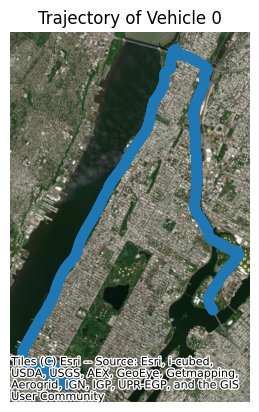

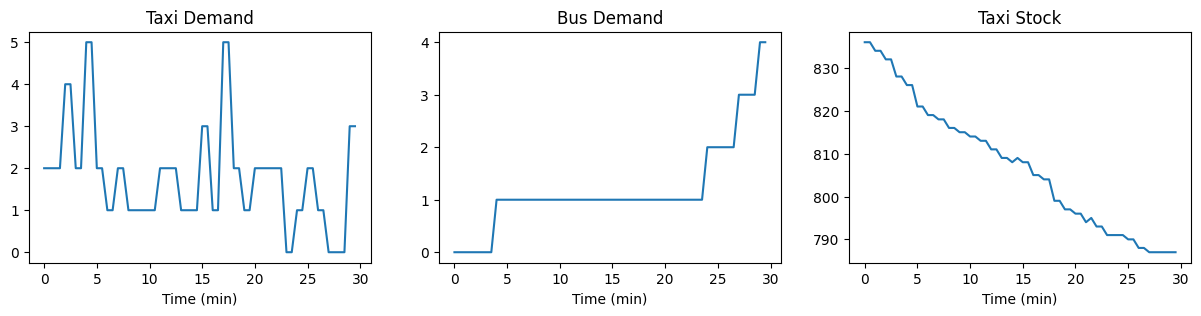

In [35]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd

# Example 1: Collect and visualize the trajectory of one vehicle
fig, ax = plt.subplots()

# add the NYC map
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(xs, ys), crs='EPSG:4326').to_crs(epsg=3857)
gdf.plot(ax = ax)
ax.set_title("Trajectory of Vehicle 0")
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_axis_off()

plt.show()

# Example 2: Minitor the state of a zone
fig, axs = plt.subplots(1,3, figsize=(15,3), sharex = True)

# The first two hours are 0-2:00, so the demand is low
axs[0].plot(taxi_demand)
axs[0].set_title("Taxi Demand")

axs[1].plot(bus_demand)
axs[1].set_title("Bus Demand")

axs[2].plot(taxi_stock)
axs[2].set_title("Taxi Stock")
for i in range(3):
      axs[i].set_xticks(range(0, 61, 10))
      axs[i].set_xticklabels(range(0, 31, 5))
      axs[i].set_xlabel("Time (min)")

plt.show()

In [36]:
sim_client.terminate()

# Section 3: Control APIs

In this section, we will see how to interact with the simulation.

In [37]:
from utils.util import *
from clients.METSRClient import METSRClient

In [38]:
config = read_run_config("configs/run_interactive_NYC.json")
config.verbose = True # set to True to see the message

In [39]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

No port number specified, find available ports for simulation instances
Container ID: c8bc4ab3a559cc7eb4f6fa8e896fa6f0b16db5f777d9d05a4c7959e1d0ed7f42

Error msg: 
['output/NYC_20250428_064451_seed_42']


In [40]:
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=config.ports[0], verbose=False, timeout=300)

Attempt to connect to ws://localhost:64674 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connection established!


In [41]:
# no private vehicle is in the simulation yet
client.query_vehicle(private_veh = True)['private_vids']

[]

In [42]:
# generate a private vehicle trip
client.generate_trip(0, -1, -1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'origin': 157, 'destination': 35, 'ID': 0}],
 'TYPE': 'CTRL_generateTrip'}

In [43]:
# state 8 means the vehicle is performing a private trip
client.query_vehicle(0, private_veh = True)

{'DATA': [{'acc': 0.0,
   'bearing': 0.0,
   'x': -73.97131440538287,
   'y': 40.76353720762698,
   'ID': 4,
   'state': 8,
   'v_type': 3,
   'speed': 0.0}],
 'TYPE': 'ANS_vehicle'}

In [44]:
# can also generate a private vehicle trip between two roads
import random
road_ids = client.query_road()
origin_road = random.choice(road_ids['orig_id'])
destination_road = random.choice(road_ids['orig_id'])

client.generate_trip_between_roads(1, origin_road, destination_road)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK',
   'origin': '420319834#0',
   'destination': '-581215200#5',
   'vehID': 1}],
 'TYPE': 'CTRL_genTripBwRoads'}

In [45]:
client.query_vehicle(1, private_veh = True)

{'DATA': [{'acc': 0.0,
   'bearing': 0.0,
   'x': -73.94978868523832,
   'y': 40.67855509567303,
   'ID': 5,
   'state': 8,
   'v_type': 3,
   'speed': 0.0}],
 'TYPE': 'ANS_vehicle'}

In [46]:
client.query_taxi(100)

{'DATA': [{'pass_num': 0,
   'origin': 131,
   'x': -73.7872104492162,
   'y': 40.64671432368773,
   'ID': 100,
   'state': 0,
   'dest': 131}],
 'TYPE': 'ANS_taxi'}

In [47]:
# generate a taxi trip with specific vehicles
client.dispatch_taxi(100, 131, 33, 2)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 100}],
 'TYPE': 'CTRL_dispatchTaxi'}

In [48]:
# We see the veh's destination is still 140, this is because it is in a pickup trip (state 6)
client.query_taxi(100)

{'DATA': [{'pass_num': 2,
   'origin': 131,
   'x': -73.7872104492162,
   'y': 40.64671432368773,
   'ID': 100,
   'state': 6,
   'dest': 131}],
 'TYPE': 'ANS_taxi'}

In [49]:
# let's tick the simulation for 180s 
client.tick(1800)

In [50]:
# aha
client.query_taxi(100)

{'DATA': [{'pass_num': 0,
   'origin': 33,
   'x': -73.79107256560587,
   'y': 40.64573182234957,
   'ID': 100,
   'state': 5,
   'dest': 33}],
 'TYPE': 'ANS_taxi'}

In [51]:
client.query_zone(139)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 0,
   'bus_demand': 0,
   'x': -73.9537822370563,
   'y': 40.81797514762926,
   'ID': 139,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

In [52]:
# generate a taxi request without specific vehicles
client.add_taxi_requests(139, 180, 3)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 139}],
 'TYPE': 'CTRL_addTaxiRequests'}

In [53]:
# this will take effect when the next round of demand processing, which happens every 60s in this scenario
client.tick(600)

In [54]:
client.query_zone(139)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 1,
   'bus_demand': 0,
   'x': -73.9537822370563,
   'y': 40.81797514762926,
   'ID': 139,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

Note: for taxi requests, one can also use orgin road id and dest road id to eliminate uncertainty.

In [55]:
buses = client.query_bus()['id_list']
buses

[4032,
 4033,
 4034,
 4035,
 4036,
 4037,
 4038,
 4000,
 4001,
 4002,
 4003,
 4004,
 4005,
 4006,
 4007,
 4008,
 4009,
 4010,
 4011,
 4012,
 4013,
 4014,
 4015,
 4016,
 4017,
 4018,
 4019,
 4020,
 4021,
 4022,
 4023,
 4024,
 4025,
 4026,
 4027,
 4028,
 4029,
 4030,
 4031]

In [56]:
# Now, let's tick a little bit longer to let the bus operate
flag = True
while flag:
      client.tick(100)
      for bus in buses:
            if client.query_bus(bus)['DATA'][0]['route'] != -1:
                  print("Tick: ", client.current_tick)
                  print(bus)
                  flag = False
                  break
      if client.current_tick>=20000:
            break

Tick:  2500
4032


In [57]:
# Our target is this bus
client.query_bus(4032)

{'DATA': [{'battery_state': 156.3062212108287,
   'route': 1640016,
   'current_stop': -1,
   'pass_num': 0,
   'ID': 4032,
   'stop_list': [180, 156, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [58]:
# generate a bus trip with specific vehicles
client.assign_request_to_bus(4032, 156, 175, 1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 4032}],
 'TYPE': 'CTRL_assignRequestToBus'}

In [59]:
# this bus has not departed yet
client.query_bus(4032)

{'DATA': [{'battery_state': 156.3062212108287,
   'route': 1640016,
   'current_stop': -1,
   'pass_num': 0,
   'ID': 4032,
   'stop_list': [180, 156, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [60]:
# wait until the bus arrives at the first stop
while True:
      client.tick(1000, wait_forever = True)
      if client.query_bus(4032)['DATA'][0]['current_stop'] == 1:
            break

In [61]:
# aha, we see the added request 
client.query_bus(4032)

{'DATA': [{'battery_state': 142.01847226738474,
   'route': 1640016,
   'current_stop': 1,
   'pass_num': 1,
   'ID': 4032,
   'stop_list': [180, 156, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [62]:
# now let's try another way to add a bus request
client.query_zone(175)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 0,
   'bus_demand': 0,
   'x': -73.98141374048745,
   'y': 40.670374325917045,
   'ID': 175,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

In [63]:
# generate a bus trip with nonspecific vehicles
client.add_bus_requests(175, 180, 1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 175}],
 'TYPE': 'CTRL_addBusRequests'}

In [64]:
# wait 60s for the demand to be processed
client.tick(600)

In [65]:
client.query_zone(175)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 0,
   'bus_demand': 1,
   'x': -73.98141374048745,
   'y': 40.670374325917045,
   'ID': 175,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

In [66]:
# let's teleport the bus!
client.query_vehicle(4032, private_veh = False)

{'DATA': [{'acc': 0.3924447591330162,
   'road': '22916381#0',
   'bearing': -151.0148233443248,
   'x': -73.9774584666736,
   'y': 40.7534015739783,
   'dist': 4.979480465147443,
   'ID': 4032,
   'state': 0,
   'v_type': 2,
   'speed': 10.737199415075587,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

In [67]:
# teleport a vehicle to a specific location (must within the same road), the fourth parameter is the target distance to the next intersection
client.teleport_trace_replay_vehicle(4032, roadID='22916381#0', laneID=0, dist=5.0, private_veh = False)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 4032}],
 'TYPE': 'CTRL_teleportTraceReplayVeh'}

In [68]:
# let's teleport the bus!
client.query_vehicle(4032, private_veh = False)

{'DATA': [{'acc': 0.3924447591330162,
   'road': '22916381#0',
   'bearing': -151.01228686281448,
   'x': -73.97749153822119,
   'y': 40.75341572151496,
   'dist': 5.0,
   'ID': 4032,
   'state': 0,
   'v_type': 2,
   'speed': 10.737199415075587,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

In [69]:
# force the vehicle to take the specified acceleration
client.control_vehicle(4032, 2.0, private_veh = False)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 4032}],
 'TYPE': 'CTRL_controlVeh'}

In [70]:
client.tick(1)

In [71]:
# now check the acceleration, yes! It is almost 2.0
client.query_vehicle(4032, private_veh = False)

{'DATA': [{'acc': 1.999999999999989,
   'road': '22916381#0',
   'bearing': -151.01228686281448,
   'x': -73.97749775736817,
   'y': 40.75340718513692,
   'dist': 3.916280042194744,
   'ID': 4032,
   'state': 0,
   'v_type': 2,
   'speed': 10.937199418055817,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

In [72]:
client.terminate()

There are more control APIs for co-simulation, which can be found in CoSimRunner.py

# Section 4: Data stream

In [73]:
from utils.util import *
from clients.METSRClient import METSRClient
from clients.KafkaDataProcessor import KafkaDataProcessor

In [74]:
config = read_run_config("configs/run_cosim_CARLAT5.json")
config.verbose = False 

In [75]:
os.chdir("docker")
os.system("docker-compose up -d")
os.chdir("..")

time.sleep(10) # wait 10s for the Kafka servers to be up

sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

['output/CARLAT05_20250428_065004_seed_42']


In [76]:
sim_client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=False)

kafkaDataProcessor = KafkaDataProcessor(config)

Attempt to connect to ws://localhost:4000 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connection established!


In [77]:
# First, generate 100 trips
sim_client.generate_trip(list(range(100)), -1, -1)


{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'origin': 11, 'destination': 9, 'ID': 0},
  {'STATUS': 'OK', 'origin': 5, 'destination': 8, 'ID': 1},
  {'STATUS': 'OK', 'origin': 12, 'destination': 0, 'ID': 2},
  {'STATUS': 'OK', 'origin': 13, 'destination': 5, 'ID': 3},
  {'STATUS': 'OK', 'origin': 11, 'destination': 6, 'ID': 4},
  {'STATUS': 'OK', 'origin': 20, 'destination': 7, 'ID': 5},
  {'STATUS': 'OK', 'origin': 20, 'destination': 12, 'ID': 6},
  {'STATUS': 'OK', 'origin': 7, 'destination': 21, 'ID': 7},
  {'STATUS': 'OK', 'origin': 17, 'destination': 20, 'ID': 8},
  {'STATUS': 'OK', 'origin': 15, 'destination': 3, 'ID': 9},
  {'STATUS': 'OK', 'origin': 7, 'destination': 11, 'ID': 10},
  {'STATUS': 'OK', 'origin': 15, 'destination': 1, 'ID': 11},
  {'STATUS': 'OK', 'origin': 16, 'destination': 18, 'ID': 12},
  {'STATUS': 'OK', 'origin': 21, 'destination': 7, 'ID': 13},
  {'STATUS': 'OK', 'origin': 4, 'destination': 0, 'ID': 14},
  {'STATUS': 'OK', 'origin': 6, 'destination': 10, 'ID':

In [78]:
# Set up 10 vehicles as V2X vehicles
sim_client.update_vehicle_sensor_type(list(range(10, 20)), 1, True)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 10},
  {'STATUS': 'OK', 'ID': 11},
  {'STATUS': 'OK', 'ID': 12},
  {'STATUS': 'OK', 'ID': 13},
  {'STATUS': 'OK', 'ID': 14},
  {'STATUS': 'OK', 'ID': 15},
  {'STATUS': 'OK', 'ID': 16},
  {'STATUS': 'OK', 'ID': 17},
  {'STATUS': 'OK', 'ID': 18},
  {'STATUS': 'OK', 'ID': 19}],
 'TYPE': 'CTRL_updateVehicleSensorType'}

In [79]:
# consume the information from the data stream every 1s
for i in range(100):
      sim_client.tick(10)
      res = kafkaDataProcessor.process()
      print(res)

None
None
None
[{'qty_SV_in_view': 42, 'altitude': 0.0, 'SemiMinorAxisAccuracy': 2.0, 'elevation_confidence': 3.0, 'heading': 0.0, 'leap_seconds': 18, 'SemiMajorAxisAccuracy': 2.0, 'latitude': 0.0001394185320952127, 'qty_SV_used': 42, 'velocity': 0.0, 'GNSS_unavailable': False, 'vid': 13, 'SemiMajorAxisOrientation': 0.0, 'climb': 0.0, 'time_confidence': 0.0, 'utc_time': 1.0, 'GNSS_networkCorrectionsPresent': False, 'GNSS_localCorrectionsPresent': False, 'GNSS_aPDOPofUnder5': False, 'GNSS_inViewOfUnder5': False, 'utc_fix_mode': 3, 'longitude': 8.862820875067494e-06, 'velocity_confidence': 0.5}, {'qty_SV_in_view': 42, 'altitude': 0.0, 'SemiMinorAxisAccuracy': 2.0, 'elevation_confidence': 3.0, 'heading': 0.0, 'leap_seconds': 18, 'SemiMajorAxisAccuracy': 2.0, 'latitude': -0.0024479989800134535, 'qty_SV_used': 42, 'velocity': 0.0, 'GNSS_unavailable': False, 'vid': 16, 'SemiMajorAxisOrientation': 0.0, 'climb': 0.0, 'time_confidence': 0.0, 'utc_time': 1.0, 'GNSS_networkCorrectionsPresent': Fa

In [80]:
res[0]

{'qty_SV_in_view': 42,
 'altitude': 0.0,
 'SemiMinorAxisAccuracy': 2.0,
 'elevation_confidence': 3.0,
 'heading': 90.06784577467818,
 'leap_seconds': 18,
 'SemiMajorAxisAccuracy': 2.0,
 'latitude': 0.00014085583656555777,
 'qty_SV_used': 42,
 'velocity': 0.0,
 'GNSS_unavailable': False,
 'vid': 16,
 'SemiMajorAxisOrientation': 0.0,
 'climb': 0.0,
 'time_confidence': 0.0,
 'utc_time': 982.0,
 'GNSS_networkCorrectionsPresent': False,
 'GNSS_localCorrectionsPresent': False,
 'GNSS_aPDOPofUnder5': False,
 'GNSS_inViewOfUnder5': False,
 'utc_fix_mode': 3,
 'longitude': -0.0008599649357239437,
 'velocity_confidence': 0.5}

In [81]:
sim_client.terminate()

In [82]:
os.chdir("docker")
os.system("docker-compose down")
os.chdir("..")